# Autocalibration 
## Step 1 [GPPAllIgnoringNitrogen]

In [2]:
import Mads
import PyCall
@show pwd()

pwd() = "/work/scripts"


"/work/scripts"

In [4]:
PyCall.py"""

import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run(calib=True)

    return dvmdostem.get_calibration_outputs()[:8]

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[:8]

dvmdostem=TEM.TEM_model()
dvmdostem.calib_mode='GPPAllIgnoringNitrogen'
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=['cmax','cmax','cmax','cmax','cmax','cmax','cmax','cmax'], \
                               pftnums=[0,1,2,3,4,5,6,7])
"""
initial_guess=[130.0, 60.0, 200.0, 450.0, 33.0, 300.0, 185.0, 120.0]
#y_init=PyCall.py"run_TEM"([134.4, 4.4, 337.6, 594.0, 3.5, 32.3, 90.3, 47.3])
#y_truth_cmax_gpp=PyCall.py"run_TEM"([134.4, 4.4, 337.6, 594.0, 3.5, 32.3, 90.3, 47.3])

NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets

8-element Vector{Float64}:
  46.0750922517851
   1.325261504948139
 113.45170295313001
 201.05661274194716
   1.024678410787601
   8.874925518035889
  28.17502611875534
  14.994458693265916

In [6]:
obs=PyCall.py"get_param_targets"()

Loading calibration_targets from : ['/work/calibration']
Resetting path...


8-element Vector{Float64}:
  46.08
   1.33
 113.44
 201.1
   1.03
   8.88
  28.18
  15.0

In [5]:
function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
#initial_guess=[134.4, 4.4, 337.6, 594.0, 3.5, 32.3, 90.3, 47.3]#[142.1, 33.6, 239.8, 473.8, 27.3, 20.0, 102.8, 62.4]
initial_guess=[130.0, 60.0, 200.0, 450.0, 33.0, 300.0, 185.0, 120.0]
obs=PyCall.py"get_param_targets"()
obs_time=1:length(obs)

Loading calibration_targets from : ['/work/calibration']
Resetting path...


1:8

In [6]:
md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["cmax0","cmax1","cmax2","cmax3","cmax4","cmax5","cmax6","cmax7"],
    paramdist=["Uniform(0.1, 200)","Uniform(0.1, 90)","Uniform(0.1, 350)","Uniform(0.1, 600)",
               "Uniform(0.1, 50)","Uniform(0.1, 350)","Uniform(0.1, 200)","Uniform(0.1, 150)"],
    obstime=obs_time,
    obsweight=[10,50,100,100,50,10,10,10],
    problemname="Calibration_GPPAllIgnoringNitrogen")

Mads.showparameters(md)
Mads.showobservations(md)

cmax0 =           134.4 distribution = Uniform(0.1, 200) 
cmax1 =             4.4 distribution = Uniform(0.1, 90) 
cmax2 =           337.6 distribution = Uniform(0.1, 350) 
cmax3 =             594 distribution = Uniform(0.1, 600) 
cmax4 =             3.5 distribution = Uniform(0.1, 50) 
cmax5 =            32.3 distribution = Uniform(0.1, 350) 
cmax6 =            90.3 distribution = Uniform(0.1, 200) 
cmax7 =            47.3 distribution = Uniform(0.1, 150) 
Number of optimizable parameters: 8
o1         target =           46.08 weight =              10 time =               1
o2         target =            1.33 weight =              50 time =               2
o3         target =          113.44 weight =             100 time =               3
o4         target =           201.1 weight =             100 time =               4
o5         target =            1.03 weight =              50 time =               5
o6         target =            8.88 weight =              10 time =               

In [7]:
yy=Mads.forward(md)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets

OrderedCollections.OrderedDict{Any, Float64} with 8 entries:
  "o1" => 46.0751
  "o2" => 1.32526
  "o3" => 113.452
  "o4" => 201.057
  "o5" => 1.02468
  "o6" => 8.87493
  "o7" => 28.175
  "o8" => 14.9945

In [8]:
calib_param, calib_information = Mads.calibrate(md)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask

(OrderedCollections.OrderedDict("cmax0" => 134.3676589045061, "cmax1" => 4.407632494101076, "cmax2" => 337.56288825269297, "cmax3" => 594.1231039023353, "cmax4" => 3.505146281210743, "cmax5" => 32.30723141417867, "cmax6" => 90.30392680939528, "cmax7" => 47.25483213729548), OptimBase.MultivariateOptimizationResults{LsqFit.LevenbergMarquardt, Float64, 1}(LsqFit.LevenbergMarquardt(), [0.35082410845011375, -1.1298265075296787, 1.1920329289429827, 1.3704447317403508, -1.0426197858000819, -0.9543660710746142, -0.09770414914958443, -0.3792747212848225], [0.35047957021044335, -1.1294288470270273, 1.1914596697557769, 1.3725175535369831, -1.0422106425893989, -0.9542945778668835, -0.09766467321698744, -0.37992354917350485], 0.12264087329219776, 2, false, true, 0.0001, 0.0, false, 0.001, 0.0, false, 1.0e-6, 0.0, false, Iter     Function value   Gradient norm 
------   --------------   --------------
, 37, 2, 0))

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


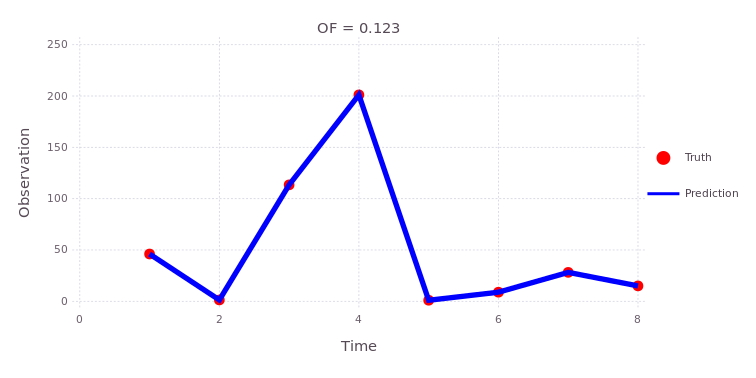

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /w

In [9]:
Mads.plotmatches(md, calib_param)

### Local sensitivity and uncertainty quantification

In [10]:
calib_param

OrderedCollections.OrderedDict{String, Float64} with 8 entries:
  "cmax0" => 134.368
  "cmax1" => 4.40763
  "cmax2" => 337.563
  "cmax3" => 594.123
  "cmax4" => 3.50515
  "cmax5" => 32.3072
  "cmax6" => 90.3039
  "cmax7" => 47.2548

In [11]:
localsa = Mads.localsa(md; filename="model_diagnostics.png", par=collect(values(calib_param)))

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflow

Dict{String, Any} with 6 entries:
  "of"          => 0.122641
  "jacobian"    => [321.184 -0.462404 … -1.37043 -20.1; -1.56336 323.069 … -0.2…
  "covar"       => [9.8021e-6 7.29758e-8 … 2.8e-7 1.39841e-6; 7.29758e-8 9.5826…
  "eigenmatrix" => [0.323127 0.253851 … -0.00945179 -0.220322; 0.00873124 0.005…
  "eigenvalues" => [2.05359e-7, 3.07091e-7, 9.57663e-6, 1.01226e-5, 1.05718e-5,…
  "stddev"      => [0.00313083, 0.00309559, 0.00140283, 0.00335373, 0.00498187,…

In [12]:
[Mads.getparamlabels(md) localsa["stddev"]]

8×2 Matrix{Any}:
 "cmax0"  0.00313083
 "cmax1"  0.00309559
 "cmax2"  0.00140283
 "cmax3"  0.00335373
 "cmax4"  0.00498187
 "cmax5"  0.00334368
 "cmax6"  0.0032018
 "cmax7"  0.0044599

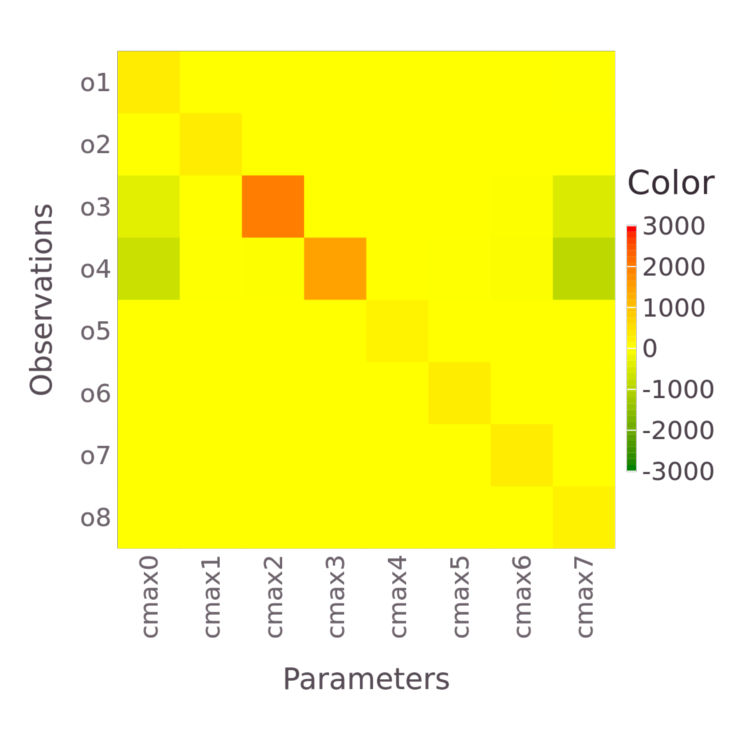

In [13]:
Mads.display("model_diagnostics-jacobian.png")

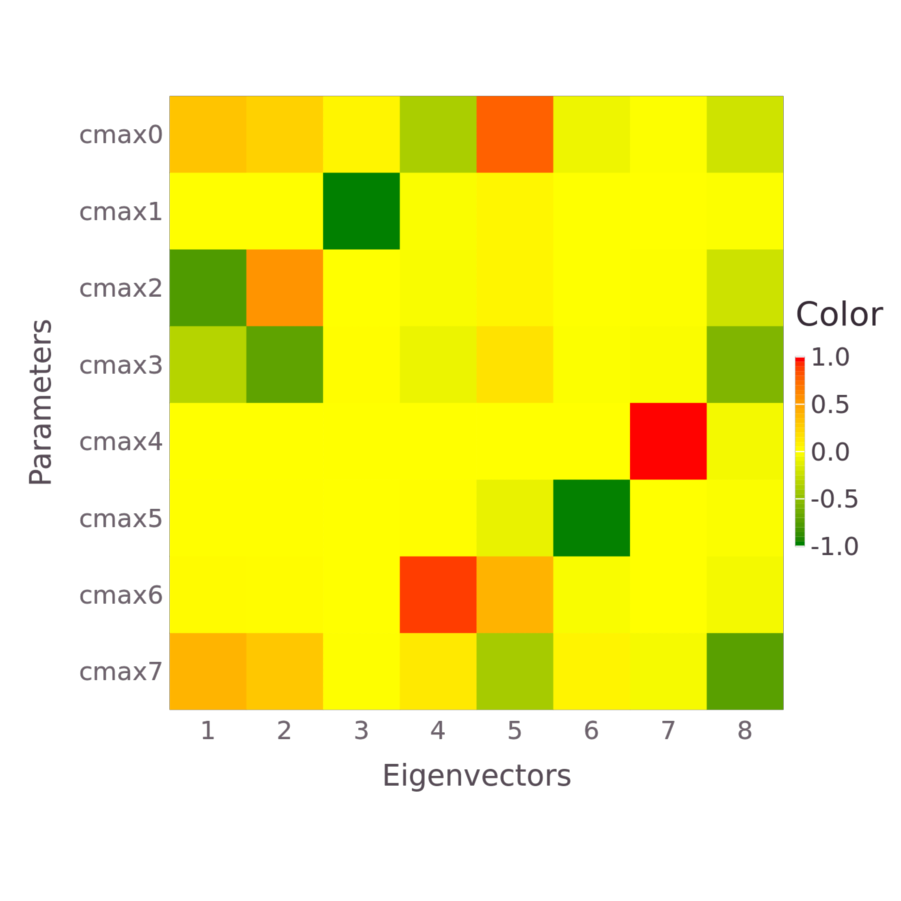

In [14]:
Mads.display("model_diagnostics-eigenmatrix.png")

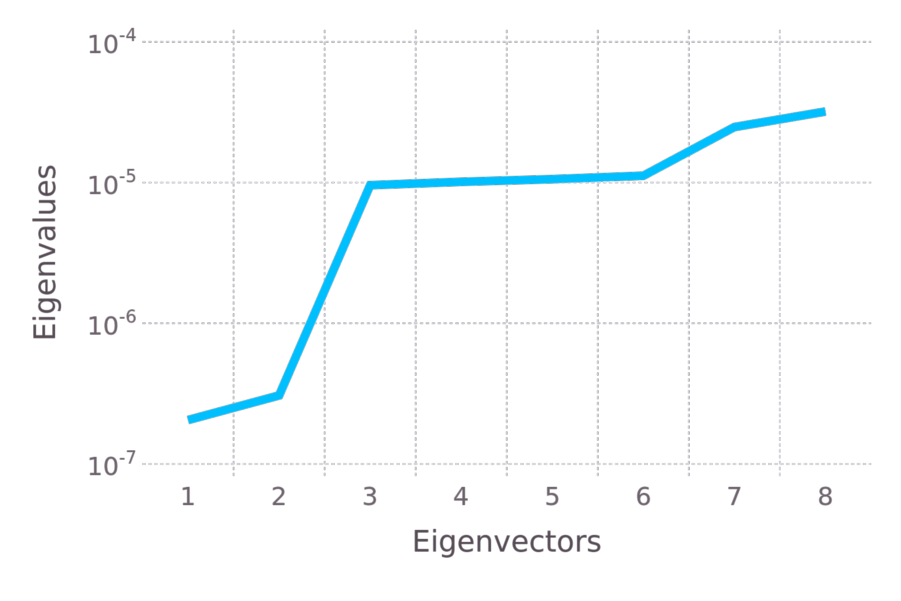

In [15]:
Mads.display("model_diagnostics-eigenvalues.png")

In [ ]:
chain, llhoods = Mads.emceesampling(md; numwalkers=10, nsteps=10000, burnin=1000, thinning=10, seed=2016, sigma=0.01)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


PyError ($(Expr(:escape, :(ccall(#= /home/develop/.julia/packages/PyCall/ygXW2/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'subprocess.CalledProcessError'>
CalledProcessError(1, '/work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run')
  File "/home/develop/.julia/packages/PyCall/ygXW2/src/pyeval.jl", line 12, in run_TEM
    ns = PyDict{String,PyObject}()
  File "/work/scripts/TEM.py", line 146, in setup
    comp_proc = subprocess.run(cmdline, shell=True,
  File "/home/develop/.pyenv/versions/3.8.6/lib/python3.8/subprocess.py", line 512, in run
    raise CalledProcessError(retcode, process.args,
┌ Warning: 2022-09-09 18:01:05 $(Expr(:escape, :(ccall(#= /home/develop/.julia/packages/PyCall/ygXW2/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))
└ @ Mads /home/develop/.julia/dev

NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
